In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

In [3]:
datasets=[['./csvs\\A211102.csv',
  './csvs\\A211105.csv',
  './csvs\\A211108.csv',
  './csvs\\A211109.csv',
  './csvs\\A211110.csv',
  './csvs\\A211112.csv',
  './csvs\\A211115.csv',
  './csvs\\A211116.csv',
  './csvs\\A211117.csv',
  './csvs\\A211118.csv',
  './csvs\\A211122.csv',
  './csvs\\A211123.csv',
  './csvs\\A211125.csv',
  './csvs\\A211206.csv',
  './csvs\\A211208.csv',
  './csvs\\A211223.csv',
  './csvs\\A211225.csv',
  './csvs\\A211228.csv',
  './csvs\\I211102.csv',
  './csvs\\I211103.csv',
  './csvs\\I211104.csv',
  './csvs\\I211108.csv',
  './csvs\\I211110.csv',
  './csvs\\I211112.csv',
  './csvs\\I211115.csv',
  './csvs\\I211118.csv',
  './csvs\\I211119.csv',
  './csvs\\I211122.csv'],
 ['./csvs\\A211103.csv', './csvs\\A211126.csv', './csvs\\A211207.csv'],
 ['./csvs\\A211124.csv',
  './csvs\\I211124.csv',
  './csvs\\I211125.csv',
  './csvs\\I211130.csv',
  './csvs\\I211201.csv',
  './csvs\\I211202.csv',
  './csvs\\I211203.csv',
  './csvs\\I211207.csv',
  './csvs\\I211208.csv',
  './csvs\\I211209.csv',
  './csvs\\I211210.csv',
  './csvs\\I211213.csv',
  './csvs\\I211215.csv',
  './csvs\\I211216.csv',
  './csvs\\I211220.csv',
  './csvs\\I211222.csv',
  './csvs\\I211223.csv'],
 ['./csvs\\I211116.csv', './csvs\\I211117.csv']]

In [4]:
path="./results/vs"
output="./results/pdf/"

In [5]:
filenames=find_the_way(path,"CB.csv")
filenames

['./results/vs\\@A211102@A211102CB.csv',
 './results/vs\\@A211102@A211105CB.csv',
 './results/vs\\@A211102@A211108CB.csv',
 './results/vs\\@A211102@A211109CB.csv',
 './results/vs\\@A211102@A211110CB.csv',
 './results/vs\\@A211102@A211112CB.csv',
 './results/vs\\@A211102@A211115CB.csv',
 './results/vs\\@A211102@A211116CB.csv',
 './results/vs\\@A211102@A211117CB.csv',
 './results/vs\\@A211102@A211118CB.csv',
 './results/vs\\@A211102@A211122CB.csv',
 './results/vs\\@A211102@A211123CB.csv',
 './results/vs\\@A211102@A211125CB.csv',
 './results/vs\\@A211102@A211206CB.csv',
 './results/vs\\@A211102@A211208CB.csv',
 './results/vs\\@A211102@A211223CB.csv',
 './results/vs\\@A211102@A211225CB.csv',
 './results/vs\\@A211102@A211228CB.csv',
 './results/vs\\@A211102@I211102CB.csv',
 './results/vs\\@A211102@I211103CB.csv',
 './results/vs\\@A211102@I211104CB.csv',
 './results/vs\\@A211102@I211108CB.csv',
 './results/vs\\@A211102@I211110CB.csv',
 './results/vs\\@A211102@I211112CB.csv',
 './results/vs\\

In [6]:
fulname={"A-A":"Active vs Active",
"A-I":"Active vs Idle",
"I-A":"Idle vs Active",
"I-I":"Idle vs Idle"}

In [7]:
hist = {} 
for i in filenames:
    x=f"{i[22]}-{i[14]}"
    hist[fulname[x]] = hist.get(fulname[x], 0) + 1


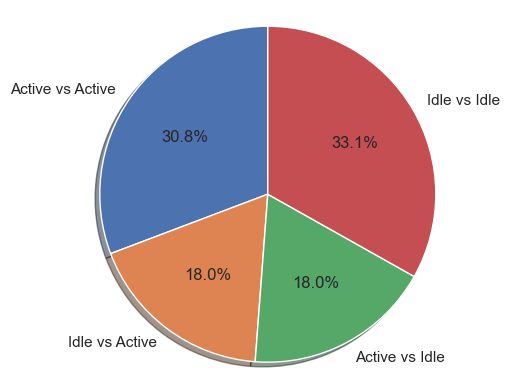

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#sizes = [15, 30, 45, 10]

sizes = hist.values()
labels =  hist.keys()

explode = (0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("pie.distirbution2.pdf",bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()

In [9]:
failed_devices=[]
failed_dict={}
for i in filenames:
    df=pd.read_csv(i)
    df=df[:-3]
    df=df[df["f1-score"]<0.50]
    temp=list(df['Unnamed: 0'].values)
    if len(temp)>0:
        durum=f"{i[22]}-{i[14]}"
        failed_devices.append(temp)
        if durum not in failed_dict:
            failed_dict[durum]=[temp]
        else:
            failed_dict[durum].append(temp)
            
            
            


In [10]:
unique_devices=sum(failed_devices, [])
unique_devices=list(set(unique_devices))
unique_devices

['Gosund Socket',
 'Luohe Cam Dog',
 'HeimVision Smart WiFi Camera',
 'Google Nest Mini',
 'Atomi Coffee Maker',
 'Netatmo Weather Station',
 'Netatmo Camera',
 'Arlo Q Camera',
 'Amazon Alexa Echo Dot',
 'Arlo Base Station',
 'Amazon Alexa Echo Studio',
 'Amazon Alexa Echo Spot',
 'Eufy HomeBase 2',
 'Gosund Plug',
 'Sonos One Speaker',
 'Yutron Plug',
 'Teckin Plug',
 'Philips Hue Bridge',
 'iRobot Roomba',
 'Smart Board',
 'Ring Base Station',
 'D-Link Mini Camera',
 'HeimVision SmartLife Radio/Lamp',
 'LG Smart TV',
 'Globe Lamp ESP_B1680C',
 'Nest Indoor Camera']

In [11]:
failed_dict

{'A-A': [['Ring Base Station'],
  ['Ring Base Station'],
  ['Ring Base Station'],
  ['Amazon Alexa Echo Spot',
   'Arlo Q Camera',
   'Globe Lamp ESP_B1680C',
   'Google Nest Mini',
   'Gosund Socket',
   'HeimVision SmartLife Radio/Lamp',
   'Nest Indoor Camera',
   'Ring Base Station',
   'Smart Board',
   'Teckin Plug'],
  ['Amazon Alexa Echo Spot',
   'Arlo Q Camera',
   'Atomi Coffee Maker',
   'Globe Lamp ESP_B1680C',
   'Gosund Socket',
   'HeimVision SmartLife Radio/Lamp',
   'Nest Indoor Camera',
   'Ring Base Station',
   'Smart Board',
   'Teckin Plug',
   'Yutron Plug'],
  ['Amazon Alexa Echo Spot',
   'Atomi Coffee Maker',
   'Globe Lamp ESP_B1680C',
   'Gosund Socket',
   'HeimVision SmartLife Radio/Lamp',
   'Nest Indoor Camera',
   'Ring Base Station',
   'Smart Board',
   'Teckin Plug',
   'Yutron Plug'],
  ['Amazon Alexa Echo Spot',
   'Atomi Coffee Maker',
   'Globe Lamp ESP_B1680C',
   'Gosund Socket',
   'HeimVision SmartLife Radio/Lamp',
   'Nest Indoor Camera',
 

In [12]:
flatted={}
for i in failed_dict:
    print(i,len(failed_dict[i]))
    f = failed_dict[i]
    flatted[i]=sum(f, [])

A-A 304
I-A 188
A-I 195
I-I 324


In [13]:
flatted

{'A-A': ['Ring Base Station',
  'Ring Base Station',
  'Ring Base Station',
  'Amazon Alexa Echo Spot',
  'Arlo Q Camera',
  'Globe Lamp ESP_B1680C',
  'Google Nest Mini',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Teckin Plug',
  'Amazon Alexa Echo Spot',
  'Arlo Q Camera',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Teckin Plug',
  'Yutron Plug',
  'Amazon Alexa Echo Spot',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Teckin Plug',
  'Yutron Plug',
  'Amazon Alexa Echo Spot',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Teck

In [14]:
flatted

{'A-A': ['Ring Base Station',
  'Ring Base Station',
  'Ring Base Station',
  'Amazon Alexa Echo Spot',
  'Arlo Q Camera',
  'Globe Lamp ESP_B1680C',
  'Google Nest Mini',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Teckin Plug',
  'Amazon Alexa Echo Spot',
  'Arlo Q Camera',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Teckin Plug',
  'Yutron Plug',
  'Amazon Alexa Echo Spot',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Teckin Plug',
  'Yutron Plug',
  'Amazon Alexa Echo Spot',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Teck

In [15]:
sonuc={}
for j in flatted:
    hist = {} 
    for x in flatted[j] : 
        hist[x] = hist.get(x, 0) + 1
    for u in unique_devices:
        if u not in hist:
            hist[u]=0
    hist=dict(sorted(hist.items()))
    sonuc[j]=hist
    
    

In [16]:
sonuc

{'A-A': {'Amazon Alexa Echo Dot': 3,
  'Amazon Alexa Echo Spot': 63,
  'Amazon Alexa Echo Studio': 17,
  'Arlo Base Station': 64,
  'Arlo Q Camera': 65,
  'Atomi Coffee Maker': 190,
  'D-Link Mini Camera': 24,
  'Eufy HomeBase 2': 2,
  'Globe Lamp ESP_B1680C': 220,
  'Google Nest Mini': 19,
  'Gosund Plug': 43,
  'Gosund Socket': 182,
  'HeimVision Smart WiFi Camera': 15,
  'HeimVision SmartLife Radio/Lamp': 183,
  'LG Smart TV': 3,
  'Luohe Cam Dog': 1,
  'Nest Indoor Camera': 100,
  'Netatmo Camera': 5,
  'Netatmo Weather Station': 24,
  'Philips Hue Bridge': 3,
  'Ring Base Station': 257,
  'Smart Board': 196,
  'Sonos One Speaker': 81,
  'Teckin Plug': 151,
  'Yutron Plug': 174,
  'iRobot Roomba': 46},
 'I-A': {'Amazon Alexa Echo Dot': 1,
  'Amazon Alexa Echo Spot': 19,
  'Amazon Alexa Echo Studio': 16,
  'Arlo Base Station': 18,
  'Arlo Q Camera': 104,
  'Atomi Coffee Maker': 94,
  'D-Link Mini Camera': 6,
  'Eufy HomeBase 2': 0,
  'Globe Lamp ESP_B1680C': 121,
  'Google Nest Mini

In [17]:
df=pd.DataFrame()


df["ind"]=sonuc["A-A"].keys()

for i in sonuc:
    print(sonuc)
    df[i]=sonuc[i].values()

col_list= ['A-A', 'A-I', 'I-A',"I-I"]
# sum specific columns
df['Sum'] = df[col_list].sum(axis=1)

{'A-A': {'Amazon Alexa Echo Dot': 3, 'Amazon Alexa Echo Spot': 63, 'Amazon Alexa Echo Studio': 17, 'Arlo Base Station': 64, 'Arlo Q Camera': 65, 'Atomi Coffee Maker': 190, 'D-Link Mini Camera': 24, 'Eufy HomeBase 2': 2, 'Globe Lamp ESP_B1680C': 220, 'Google Nest Mini': 19, 'Gosund Plug': 43, 'Gosund Socket': 182, 'HeimVision Smart WiFi Camera': 15, 'HeimVision SmartLife Radio/Lamp': 183, 'LG Smart TV': 3, 'Luohe Cam Dog': 1, 'Nest Indoor Camera': 100, 'Netatmo Camera': 5, 'Netatmo Weather Station': 24, 'Philips Hue Bridge': 3, 'Ring Base Station': 257, 'Smart Board': 196, 'Sonos One Speaker': 81, 'Teckin Plug': 151, 'Yutron Plug': 174, 'iRobot Roomba': 46}, 'I-A': {'Amazon Alexa Echo Dot': 1, 'Amazon Alexa Echo Spot': 19, 'Amazon Alexa Echo Studio': 16, 'Arlo Base Station': 18, 'Arlo Q Camera': 104, 'Atomi Coffee Maker': 94, 'D-Link Mini Camera': 6, 'Eufy HomeBase 2': 0, 'Globe Lamp ESP_B1680C': 121, 'Google Nest Mini': 7, 'Gosund Plug': 15, 'Gosund Socket': 111, 'HeimVision Smart WiFi

In [18]:
df

,ind,A-A,I-A,A-I,I-I,Sum
0,Amazon Alexa Echo Dot,3,1,0,0,4
1,Amazon Alexa Echo Spot,63,19,46,15,143
2,Amazon Alexa Echo Studio,17,16,8,8,49
3,Arlo Base Station,64,18,88,13,183
4,Arlo Q Camera,65,104,142,177,488
5,Atomi Coffee Maker,190,94,96,184,564
6,D-Link Mini Camera,24,6,22,15,67
7,Eufy HomeBase 2,2,0,2,5,9
8,Globe Lamp ESP_B1680C,220,121,121,218,680
9,Google Nest Mini,19,7,18,5,49


In [19]:
df=df[df["Sum"]>21]

In [20]:
data=df.set_index('ind')

In [21]:
del data["Sum"]
data

,A-A,I-A,A-I,I-I
ind,,,,
Amazon Alexa Echo Spot,63,19,46,15
Amazon Alexa Echo Studio,17,16,8,8
Arlo Base Station,64,18,88,13
Arlo Q Camera,65,104,142,177
Atomi Coffee Maker,190,94,96,184
D-Link Mini Camera,24,6,22,15
Globe Lamp ESP_B1680C,220,121,121,218
Google Nest Mini,19,7,18,5
Gosund Plug,43,15,15,24


In [22]:
data.columns = pd.Series(data.columns.to_list()).replace(fulname).to_list()
data

,Active vs Active,Idle vs Active,Active vs Idle,Idle vs Idle
ind,,,,
Amazon Alexa Echo Spot,63,19,46,15
Amazon Alexa Echo Studio,17,16,8,8
Arlo Base Station,64,18,88,13
Arlo Q Camera,65,104,142,177
Atomi Coffee Maker,190,94,96,184
D-Link Mini Camera,24,6,22,15
Globe Lamp ESP_B1680C,220,121,121,218
Google Nest Mini,19,7,18,5
Gosund Plug,43,15,15,24


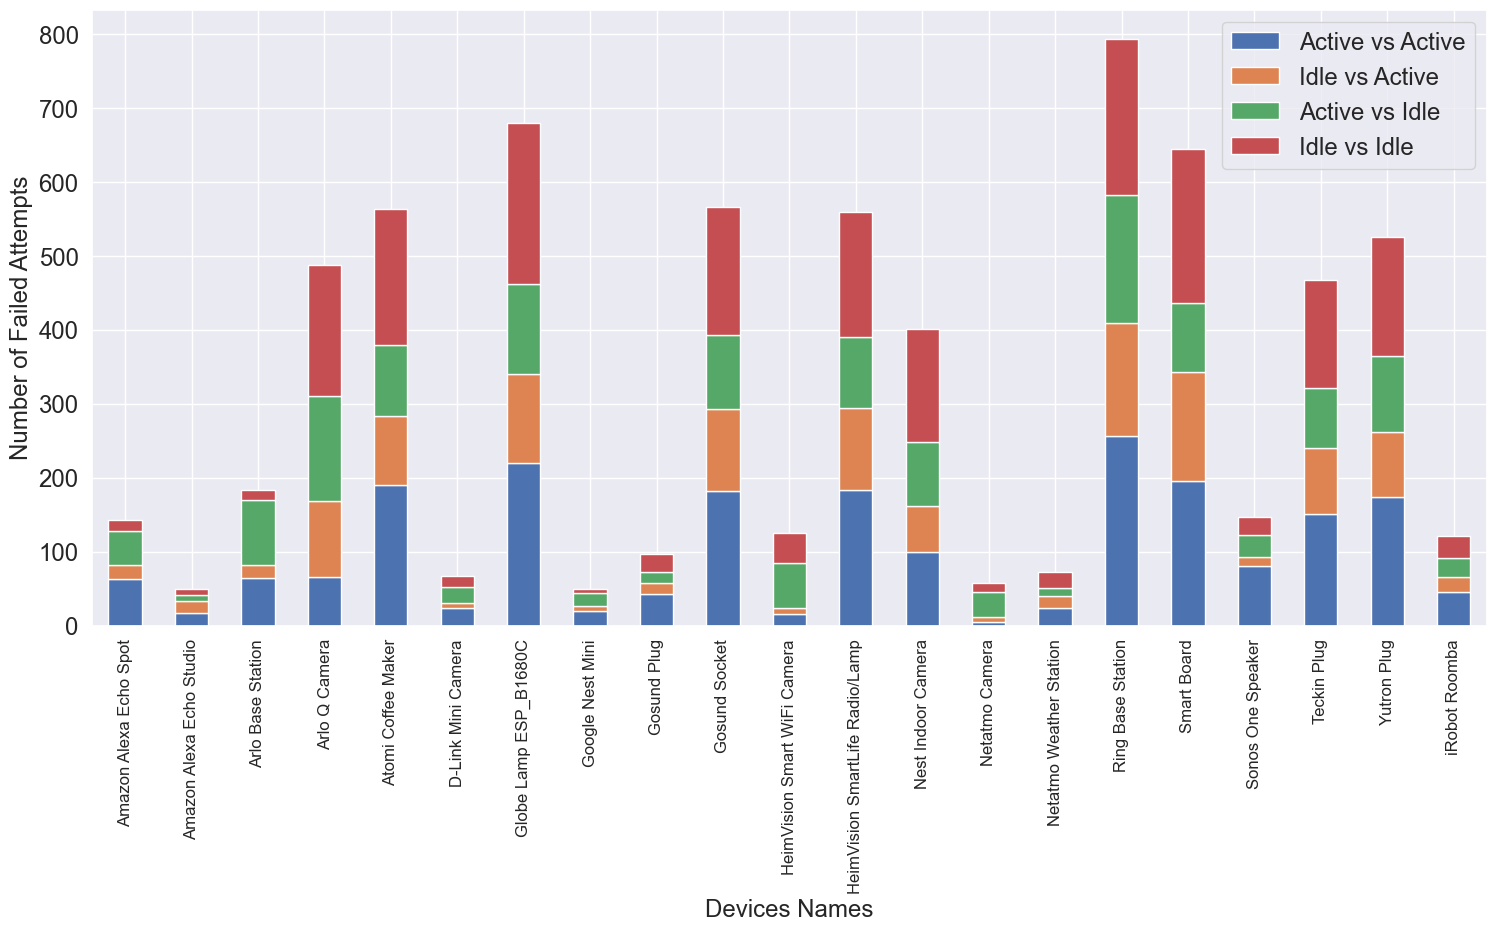

In [23]:
import seaborn as sns
sns.set_theme(style="darkgrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
import matplotlib.pylab as pylab

#pylab.rcParams.update(params)

data.plot.bar(stacked=True,figsize=(18,8))
graph_name=f"{output}renklifailed.pdf"
plt.ylabel("Number of Failed Attempts")
plt.xlabel("Devices Names")
plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)

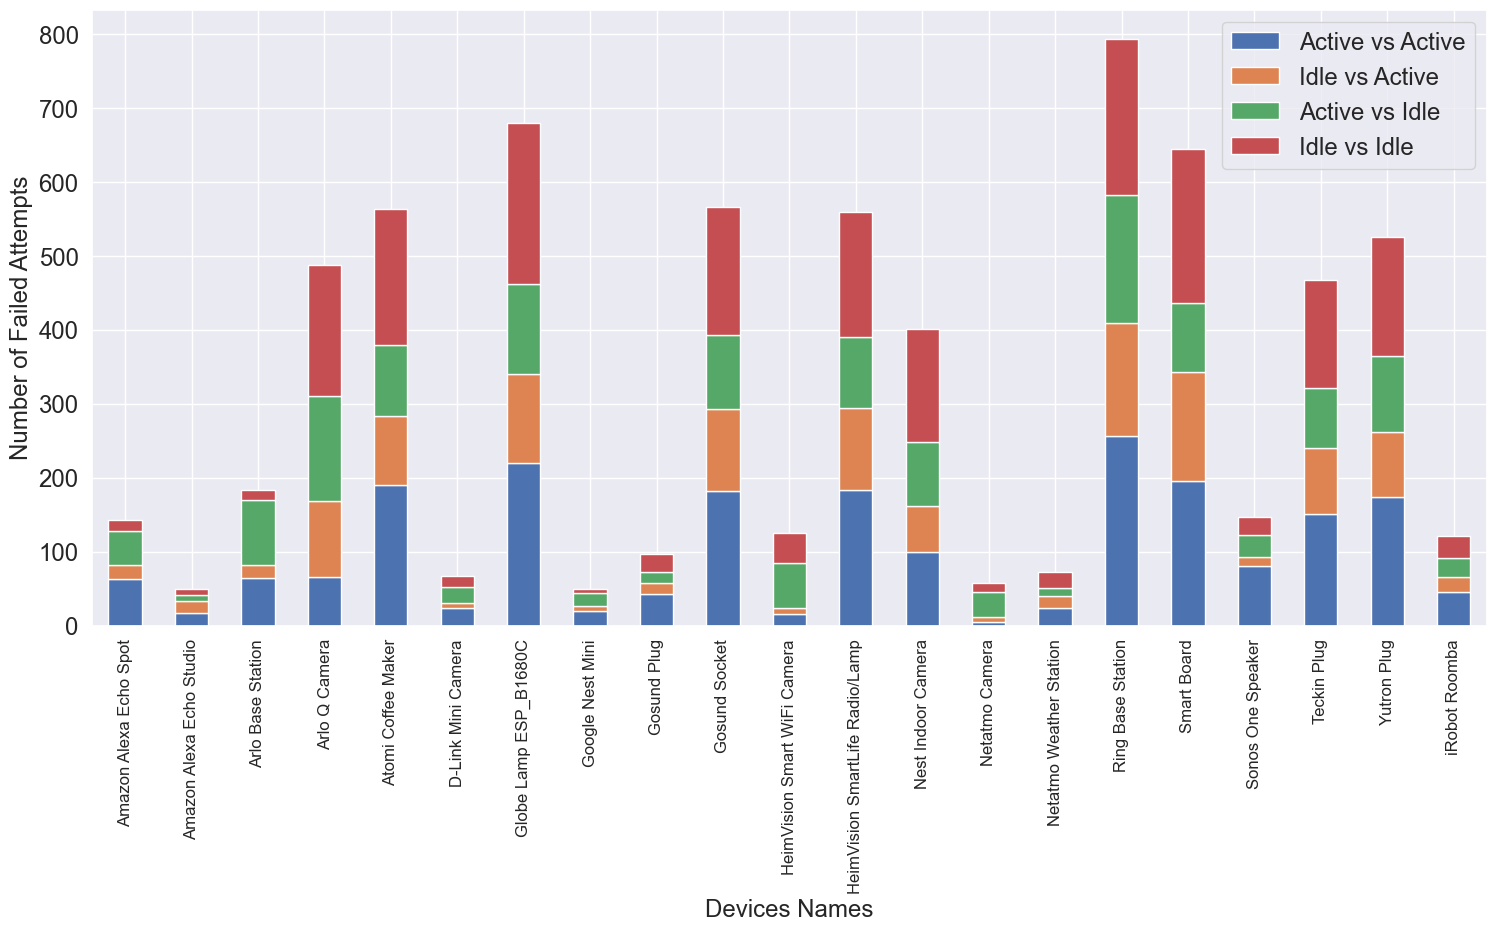

In [46]:
import seaborn as sns
sns.set_theme(style="darkgrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
import matplotlib.pylab as pylab

#pylab.rcParams.update(params)

data.plot.bar(stacked=True,figsize=(18,8))
graph_name=f"{output}renklifailed.pdf"
plt.ylabel("Number of Failed Attempts")
plt.xlabel("Devices Names")
plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)

In [47]:
failed_devices

[['Ring Base Station'],
 ['Ring Base Station'],
 ['Ring Base Station'],
 ['Amazon Alexa Echo Spot',
  'Arlo Q Camera',
  'Globe Lamp ESP_B1680C',
  'Google Nest Mini',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Teckin Plug'],
 ['Amazon Alexa Echo Spot',
  'Arlo Q Camera',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Teckin Plug',
  'Yutron Plug'],
 ['Amazon Alexa Echo Spot',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Teckin Plug',
  'Yutron Plug'],
 ['Amazon Alexa Echo Spot',
  'Atomi Coffee Maker',
  'Globe Lamp ESP_B1680C',
  'Gosund Socket',
  'HeimVision SmartLife Radio/Lamp',
  'Nest Indoor Camera',
  'Ring Base Station',
  'Smart Board',
  'Tecki

In [48]:
hist = {} 
for i in failed_devices:
    for x in i : 
        hist[x] = hist.get(x, 0) + 1
hist=dict(sorted(hist.items()))

In [49]:
D = {}
for i in hist:
    if hist[i]>12: #We accept a margin of error of 2% as normal. therefore we list devices that have been seen more than 12 times.
        D[i]=hist[i]
        

In [50]:
D

{'Amazon Alexa Echo Spot': 143,
 'Amazon Alexa Echo Studio': 49,
 'Arlo Base Station': 183,
 'Arlo Q Camera': 488,
 'Atomi Coffee Maker': 564,
 'D-Link Mini Camera': 67,
 'Globe Lamp ESP_B1680C': 680,
 'Google Nest Mini': 49,
 'Gosund Plug': 97,
 'Gosund Socket': 567,
 'HeimVision Smart WiFi Camera': 125,
 'HeimVision SmartLife Radio/Lamp': 559,
 'Nest Indoor Camera': 401,
 'Netatmo Camera': 58,
 'Netatmo Weather Station': 72,
 'Ring Base Station': 794,
 'Smart Board': 645,
 'Sonos One Speaker': 147,
 'Teckin Plug': 467,
 'Yutron Plug': 526,
 'iRobot Roomba': 121}

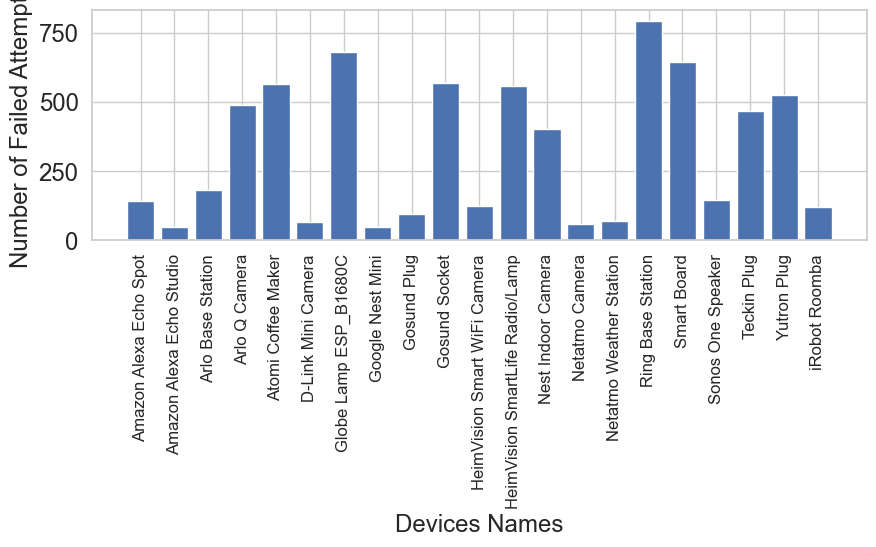

In [51]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(10,3))


plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x
plt.xticks(rotation=90) 
graph_name=f"{output}failed.pdf"
plt.ylabel("Number of Failed Attempts")
plt.xlabel("Devices Names")
plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()

In [52]:
D

{'Amazon Alexa Echo Spot': 143,
 'Amazon Alexa Echo Studio': 49,
 'Arlo Base Station': 183,
 'Arlo Q Camera': 488,
 'Atomi Coffee Maker': 564,
 'D-Link Mini Camera': 67,
 'Globe Lamp ESP_B1680C': 680,
 'Google Nest Mini': 49,
 'Gosund Plug': 97,
 'Gosund Socket': 567,
 'HeimVision Smart WiFi Camera': 125,
 'HeimVision SmartLife Radio/Lamp': 559,
 'Nest Indoor Camera': 401,
 'Netatmo Camera': 58,
 'Netatmo Weather Station': 72,
 'Ring Base Station': 794,
 'Smart Board': 645,
 'Sonos One Speaker': 147,
 'Teckin Plug': 467,
 'Yutron Plug': 526,
 'iRobot Roomba': 121}

In [53]:
hist

{'Amazon Alexa Echo Dot': 4,
 'Amazon Alexa Echo Spot': 143,
 'Amazon Alexa Echo Studio': 49,
 'Arlo Base Station': 183,
 'Arlo Q Camera': 488,
 'Atomi Coffee Maker': 564,
 'D-Link Mini Camera': 67,
 'Eufy HomeBase 2': 9,
 'Globe Lamp ESP_B1680C': 680,
 'Google Nest Mini': 49,
 'Gosund Plug': 97,
 'Gosund Socket': 567,
 'HeimVision Smart WiFi Camera': 125,
 'HeimVision SmartLife Radio/Lamp': 559,
 'LG Smart TV': 3,
 'Luohe Cam Dog': 1,
 'Nest Indoor Camera': 401,
 'Netatmo Camera': 58,
 'Netatmo Weather Station': 72,
 'Philips Hue Bridge': 10,
 'Ring Base Station': 794,
 'Smart Board': 645,
 'Sonos One Speaker': 147,
 'Teckin Plug': 467,
 'Yutron Plug': 526,
 'iRobot Roomba': 121}

In [54]:
df=pd.read_csv('./results/vs\\@A211108@A211115CB.csv')

In [55]:
df

,Unnamed: 0,precision,recall,f1-score,support
0,AMCREST WiFi Camera,0.987112,0.977377,0.982221,5658.000000
1,Amazon Alexa Echo Dot,0.806871,0.916208,0.858071,23969.000000
2,Amazon Alexa Echo Spot,0.146268,0.798995,0.247270,14932.000000
3,Amazon Alexa Echo Studio,0.862718,0.778929,0.818685,14209.000000
4,Amazon Plug,0.991597,0.905702,0.946705,1824.000000
5,Arlo Base Station,0.994885,0.991539,0.993209,110057.000000
6,Arlo Q Camera,0.948362,0.941548,0.944943,55184.000000
7,Atomi Coffee Maker,0.180468,0.017647,0.032150,7140.000000
8,Borun/Sichuan-AI Camera,0.933627,0.965999,0.949537,17264.000000
9,D-Link Mini Camera,0.545166,0.985482,0.683013,1171.000000
